Q1 - Loading the day/night dataset from the kaggle

In [4]:
!file archive.zip
!apt-get install unzip
!unzip archive.zip


archive.zip: Zip archive data, at least v4.5 to extract, compression method=deflate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Archive:  archive.zip
  inflating: day_night_images/test/day/20151101_152050.jpg  
  inflating: day_night_images/test/day/20151101_152512.jpg  
  inflating: day_night_images/test/day/20151101_165048.jpg  
  inflating: day_night_images/test/day/20151101_222053.jpg  
  inflating: day_night_images/test/day/20151101_225048.jpg  
  inflating: day_night_images/test/day/20151101_232057.jpg  
  inflating: day_night_images/test/day/20151101_235039.jpg  
  inflating: day_night_images/test/day/20151102_002051.jpg  
  inflating: day_night_images/test/day/20151102_005050.jpg  
  inflating: day_night_images/test/day/20151102_055603.jpg  
  inflating: day_night_images/test/day/20151102_060941.jpg  
  infla

Importing the required libraries

In [46]:
import os
from PIL import Image
import numpy as np


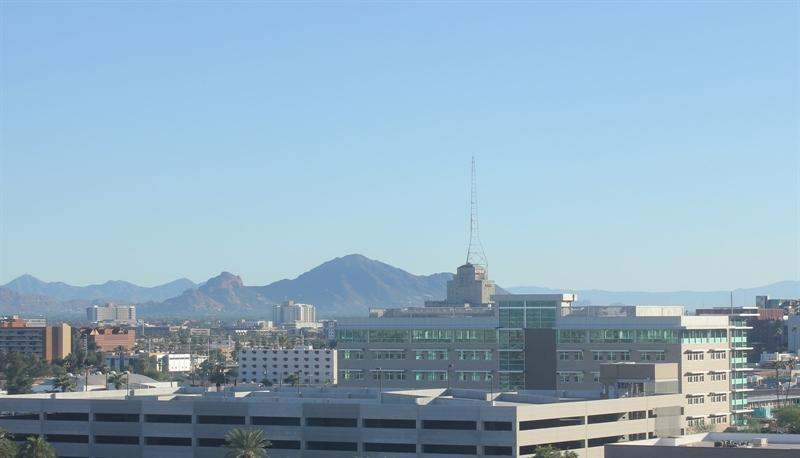

In [47]:
image = Image.open('./data/test/day/20151101_152050.jpg')
Image.open('./data/test/day/20151101_152050.jpg')

Loading the dataset into the list

In [48]:
# Paths to the day and night directories
daytime_path = './data/test/day'
nighttime_path = './data/test/night'

# Declaring the empty lists
day_image = []
night_image = []

#load images and converting to numpy arrays & adding them to the list
for file_name in os.listdir(daytime_path):
    image = Image.open(os.path.join(daytime_path, file_name))
    image_array = np.array(image)
    day_image.append(image_array)

for file_name in os.listdir(nighttime_path):
    image = Image.open(os.path.join(nighttime_path, file_name))
    image_array = np.array(image)
    night_image.append(image_array)


For day

In [49]:
#This cell calculates the avg. intensities
#This cell calculates the average intensities of the R,G,B channels in day set
R_day = []
G_day = []
B_day = []

for image_array in day_image:
    R, G, B = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]
    R_avg = np.mean(R)
    G_avg = np.mean(G)
    B_avg = np.mean(B)

    R_day.append(R_avg)
    G_day.append(G_avg)
    B_day.append(B_avg)

For night

In [50]:
#This cell calculates the intensities in night set
R_night = []
G_night = []
B_night = []

for image_array in night_image:
    R, G, B = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]
    R_avg = np.mean(R)
    G_avg = np.mean(G)
    B_avg = np.mean(B)

    R_night.append(R_avg)
    G_night.append(G_avg)
    B_night.append(B_avg)

Function to calculate the average intensity of the composite image and storing in the list

In [51]:
#composite intensity of day set
composite_day = []
for i in range(len(R_day)):
    avg = (R_day[i] + G_day[i] + B_day[i])/3
    composite_day.append(avg)

Similarly, doing the same for night

In [52]:
#composite intensity of night set
composite_night = []
for i in range(len(R_night)):
    avg = (R_night[i] + G_night[i] + B_night[i])/3
    composite_night.append(avg)

Storing the combined dataset

In [53]:
#Q3 : combining the whole data to find cdf and pdf of given data
combined_R = R_day + R_night
combined_G = G_day + G_night
combined_B = B_day + B_night

combined_composite = composite_day + composite_night


finding the pdf

<Axes: ylabel='Density'>

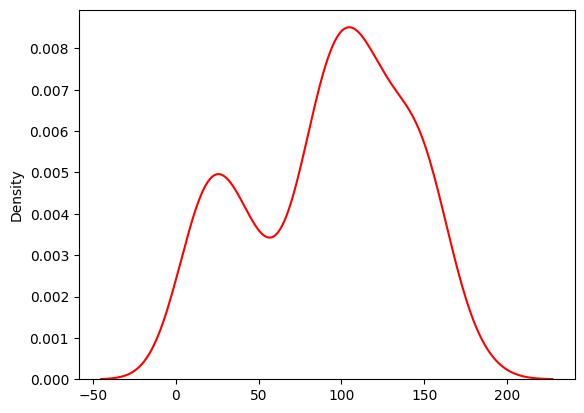

In [54]:
#pdf for combined Red channel
import seaborn as sns
sns.kdeplot(combined_R, color='red', label='Red')







<Axes: ylabel='Density'>

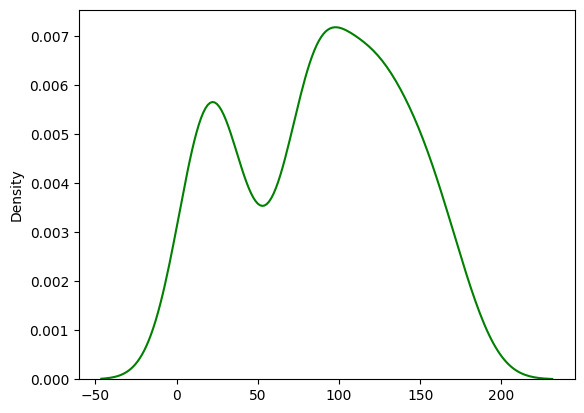

In [55]:
#pdf for combined Green channel
sns.kdeplot(combined_G, color='green', label='Green')


<Axes: ylabel='Density'>

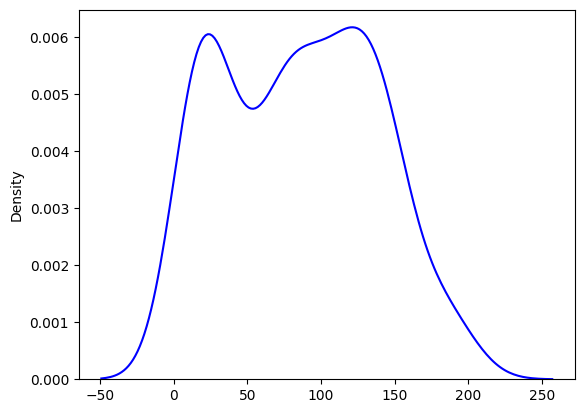

In [56]:
#pdf for combined Blue channel
sns.kdeplot(combined_B, color='blue', label='Blue')

<Axes: ylabel='Density'>

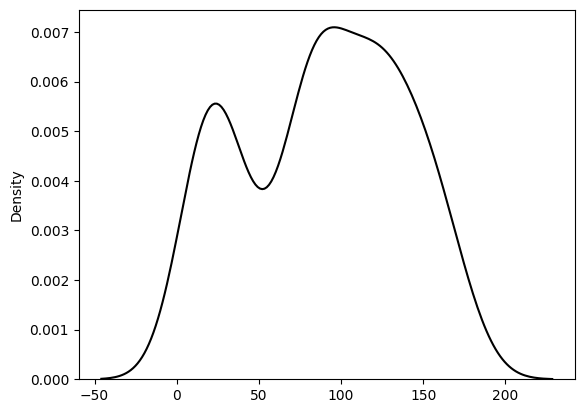

In [57]:
#pdf for combined composite channel
sns.kdeplot(combined_composite, color='black', label='Composite')

Finding the cdf || The only change is to make cumulative attribute true in the function

<Axes: ylabel='Density'>

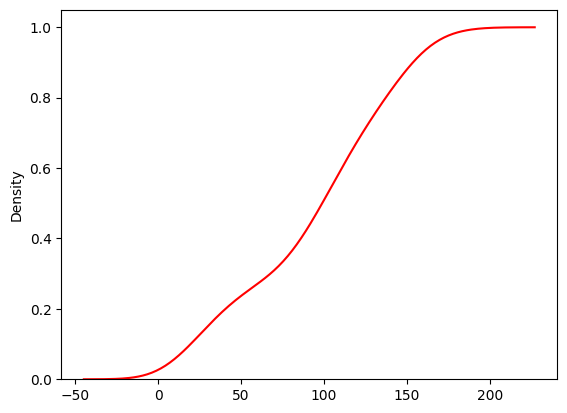

In [58]:
#cdf for combined Red channel
sns.kdeplot(combined_R, color='red', label='red', cumulative=True)


<Axes: ylabel='Density'>

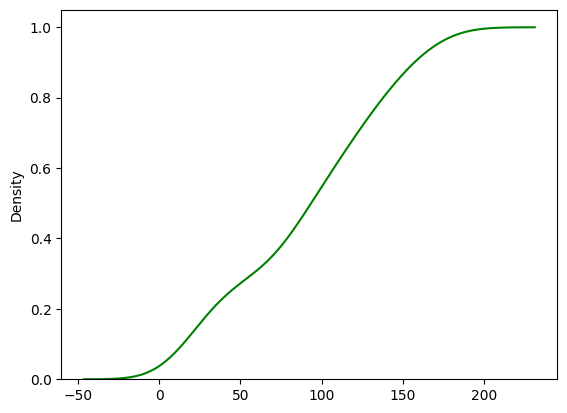

In [59]:
#cdf for combined Green channel
sns.kdeplot(combined_G, color='green', label='green', cumulative=True)

<Axes: ylabel='Density'>

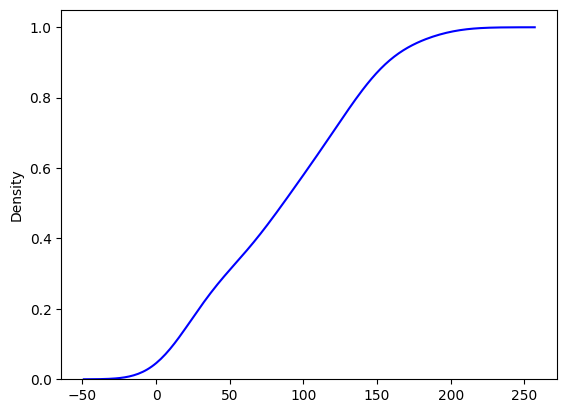

In [60]:
#cdf for combined Blue channel
sns.kdeplot(combined_B, color='blue', label='blue', cumulative=True)

<Axes: ylabel='Density'>

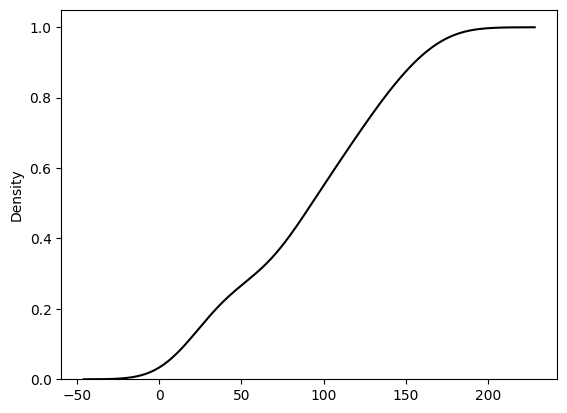

In [61]:
#cdf for combined composite channel
sns.kdeplot(combined_composite, color='black', label='black', cumulative=True)

PDF for images that are having daytime

<Axes: ylabel='Density'>

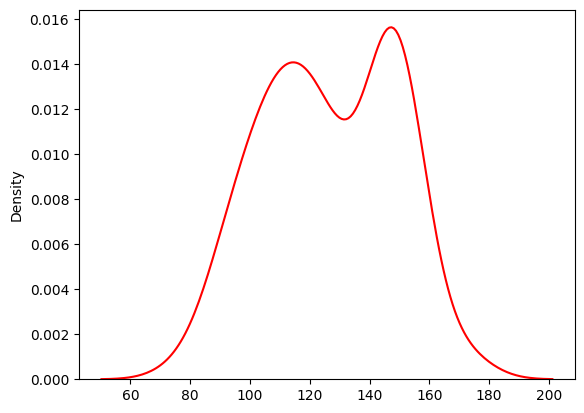

In [62]:
sns.kdeplot(R_day, color='red', label='Red')

<Axes: ylabel='Density'>

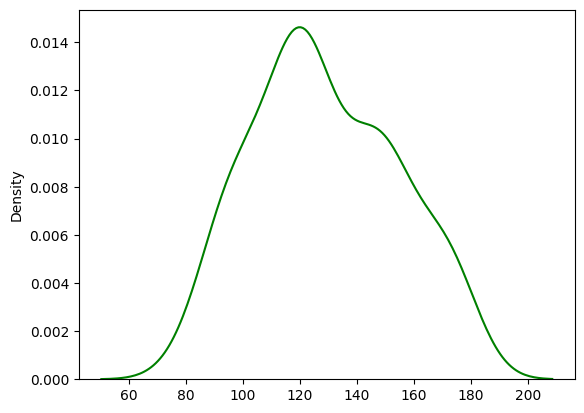

In [63]:
sns.kdeplot(G_day, color='green', label='Green')

<Axes: ylabel='Density'>

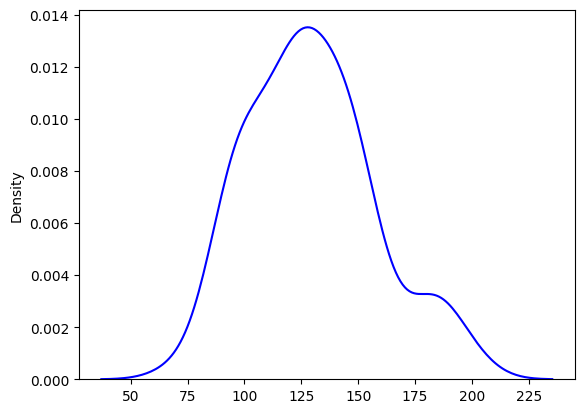

In [64]:
sns.kdeplot(B_day, color='blue', label='Blue')

<Axes: ylabel='Density'>

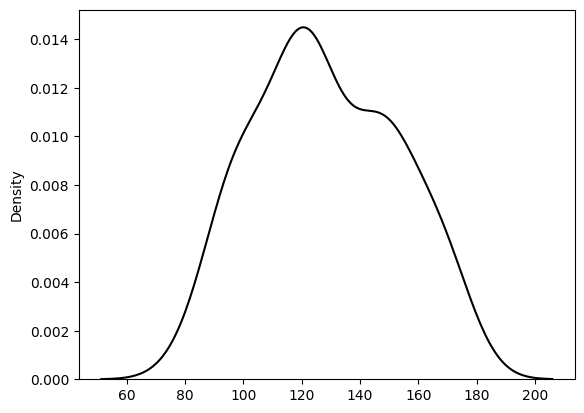

In [65]:
sns.kdeplot(composite_day, color='black', label='composite_day')

CDF for the images having day-time

<Axes: ylabel='Density'>

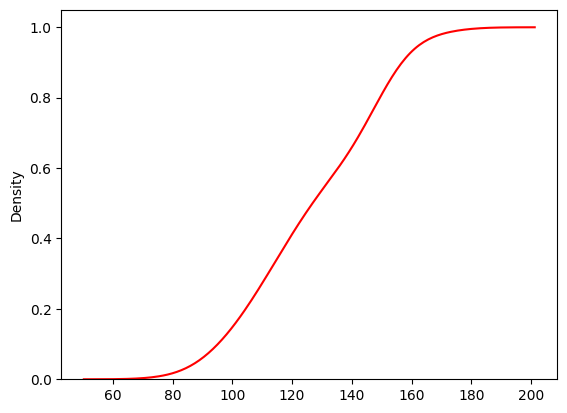

In [71]:
sns.kdeplot(R_day, color='red', label='Red', cumulative=True)

<Axes: ylabel='Density'>

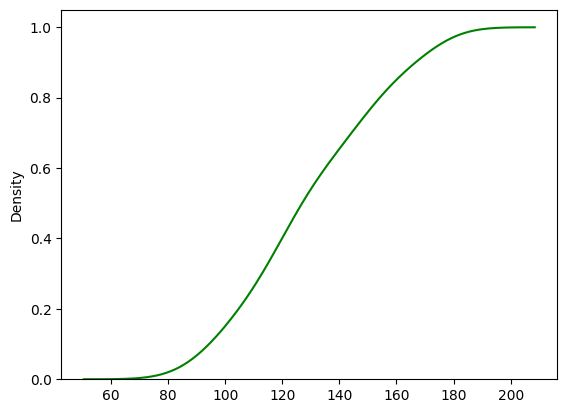

In [72]:
sns.kdeplot(G_day, color='green', label='Green', cumulative=True)

<Axes: ylabel='Density'>

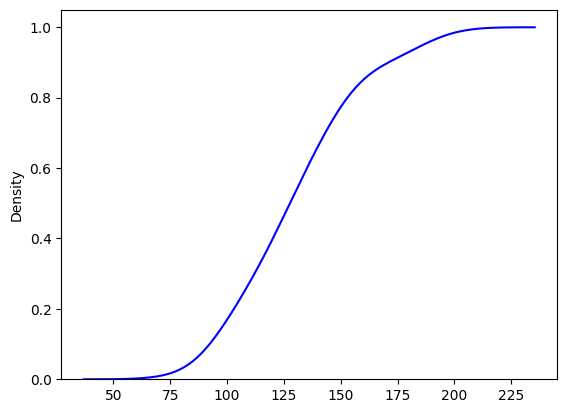

In [73]:
sns.kdeplot(B_day, color='blue', label='Blue', cumulative=True)

<Axes: ylabel='Density'>

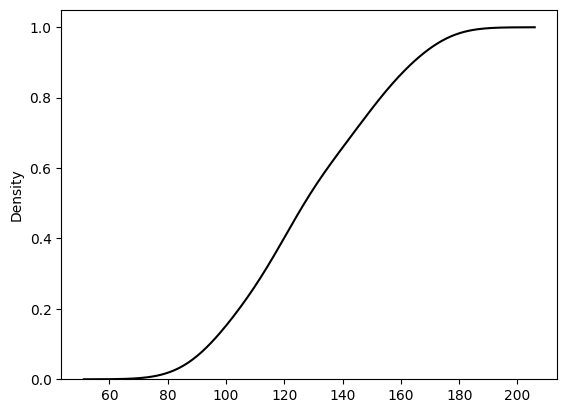

In [74]:
sns.kdeplot(composite_day, color='black', label='Black', cumulative=True)

PDF for images having night time

<Axes: ylabel='Density'>

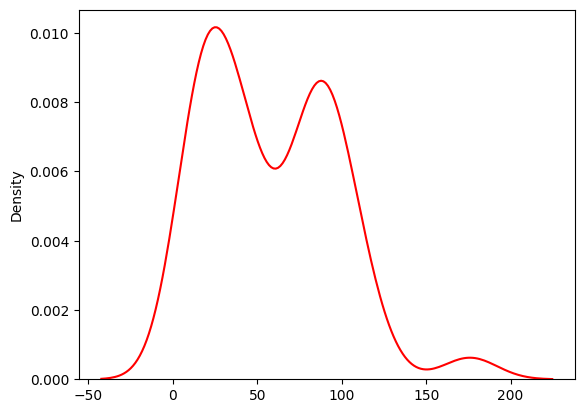

In [66]:
sns.kdeplot(R_night, color='red', label='Red')

<Axes: ylabel='Density'>

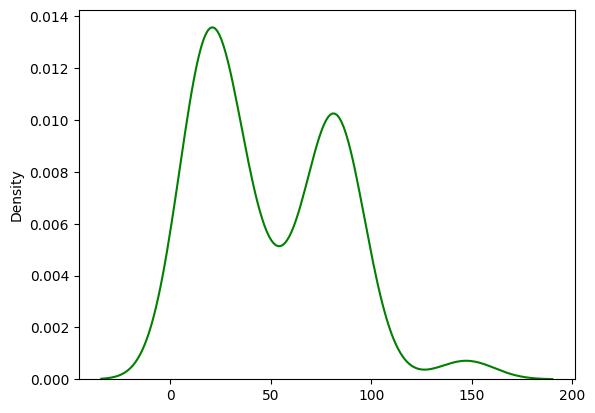

In [67]:
sns.kdeplot(G_night, color='green', label='Green')

<Axes: ylabel='Density'>

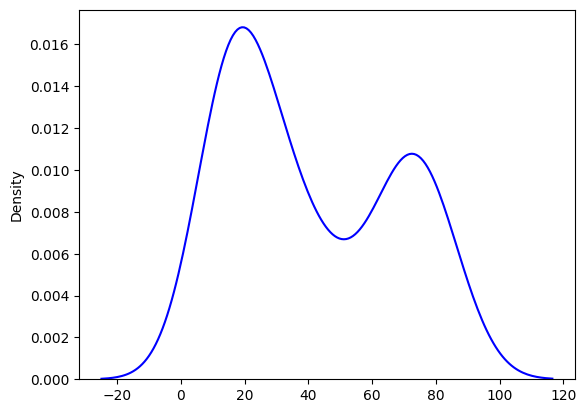

In [69]:
sns.kdeplot(B_night, color='blue', label='Blue')

<Axes: ylabel='Density'>

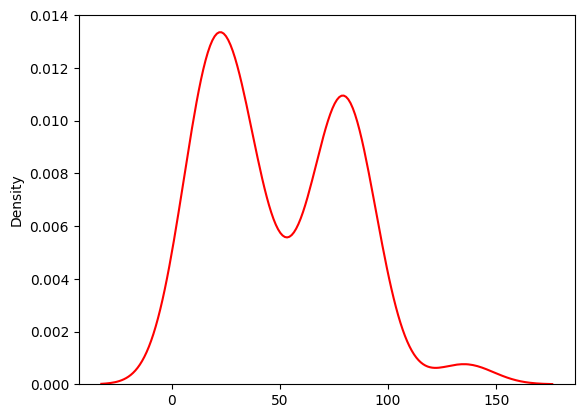

In [70]:
sns.kdeplot(composite_night, color='red', label='black')

CDF for images having day time

<Axes: ylabel='Density'>

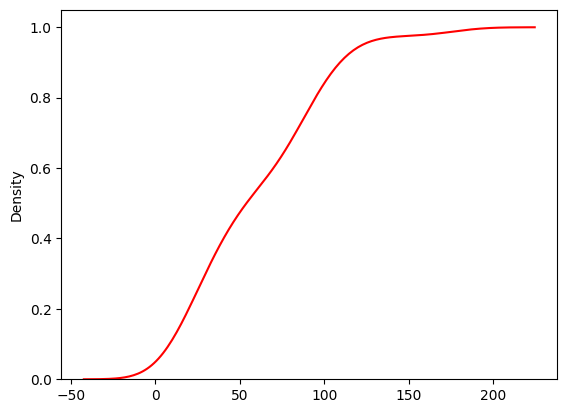

In [75]:
sns.kdeplot(R_night, color='red', label='Red', cumulative=True)

<Axes: ylabel='Density'>

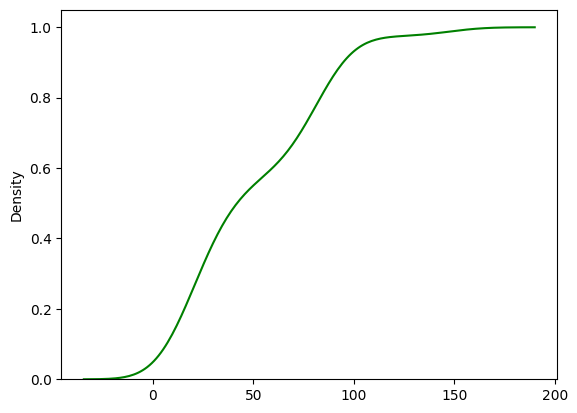

In [76]:
sns.kdeplot(G_night, color='green', label='Green', cumulative=True)

<Axes: ylabel='Density'>

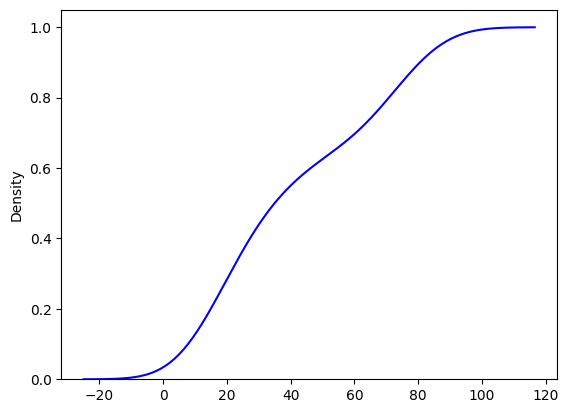

In [77]:
sns.kdeplot(B_night, color='blue', label='Blue', cumulative=True)

<Axes: ylabel='Density'>

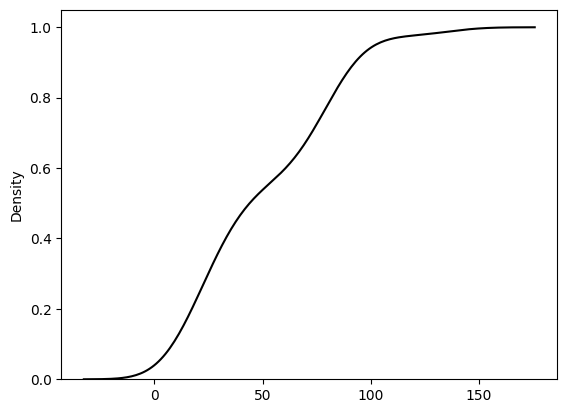

In [78]:
sns.kdeplot(composite_night, color='black', label='Black', cumulative=True)

Finding the probability to determine whether a image is day or night

In [21]:
from scipy.stats import gaussian_kde

In [29]:
image = '/content/data/training/day/20151102_160120.jpg'

In [23]:
#probability for given image is a day image

def probability_image_is_a_day(image):
  img = Image.open(image)
  img_array = np.array(img)
  R, G, B = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
  R_avg = np.mean(R)
  G_avg = np.mean(G)
  B_avg = np.mean(B)
  composite_avg = (R_avg + G_avg + B_avg)/3
  kde_composite_day = gaussian_kde(composite_day)
  kde_composite_night = gaussian_kde(composite_night)

  probability = kde_composite_day(composite_avg)/(kde_composite_day(composite_avg) + kde_composite_night(composite_avg))
  return probability


In [24]:
probability_image_is_a_day(image)

array([0.82093201])

In [25]:
image = '/content/data/training/night/20151116_012254.jpg'

In [26]:
#probability for given image is a day image

def probability_image_is_a_day(image):
  img = Image.open(image)
  img_array = np.array(img)
  R, G, B = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
  R_avg = np.mean(R)
  G_avg = np.mean(G)
  B_avg = np.mean(B)
  composite_avg = (R_avg + G_avg + B_avg)/3
  kde_composite_day = gaussian_kde(composite_day)
  kde_composite_night = gaussian_kde(composite_night)

  probability = kde_composite_day(composite_avg)/(kde_composite_day(composite_avg) + kde_composite_night(composite_avg))
  return probability


In [27]:
probability_image_is_a_day(image)

array([0.01757592])